# Building and training a Perceptron from scratch

First some imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
sns.set()

## Perceptron class
- adheres to scikit-learn api
    - `fit(X, y)`, `predict(X, y)`
    
We initialize the perceptron with 
1. learning rate
2. training epochs (how often do we loop over our training data and apply the delta rule?)

In [2]:
class Perceptron:
    def __init__(self, lr: float, epochs: int, random_state = 1):
        self.rng = np.random.default_rng(random_state)
        self.epochs = epochs
        self.lr = lr
        self.weights = None  # placeholder for the weights of the perceptron we will set later
        self.weights_history = []  # we record the weights during training so that we can plot them later
        self.loss_history = []  # we record the loss of the model

    def fit(self, X, y):
        num_data = len(X)

        # initialize weights
        num_weights = X.shape[-1] + 1  # +1 for w0
        self.weights = self.rng.uniform(size=(1, num_weights))
        self.weights_history.append(self.weights.flatten())

        # we add one column with ones for w0
        num_data = len(X)
        ones_list = np.ones(shape=(num_data, 1))
        X = np.hstack([ones_list, X])

        # check error of untrained classifier
        err = self.score(X, y)
        self.loss_history.append(err)

        # training
        for epoch in range(self.epochs):
            predictions = self.predict(X)
            deviation = y - predictions
            deviation = np.expand_dims(deviation, -1)
            delta = self.lr / num_data * np.sum(deviation * X, axis=0)
            self.weights += delta

            self.weights_history.append(self.weights.flatten())
            self.loss_history.append(self.score(X, y))

    def predict(self, X):
        if X.shape[-1] < self.weights.shape[-1]:  # prepend ones for w0 if necessary
            num_data = len(X)
            ones_list = np.ones(shape=(num_data, 1))
            X = np.hstack([ones_list, X])
        addends = self.weights * X
        f_x = np.sum(addends, axis=1)
        return f_x

    def score(self, X, y):
        predictions = self.predict(X)
        E = 1 / len(y) * 1 / 2 * np.sum((y - predictions) ** 2)
        return E

## Evaluation

We first create an artificial 2-dimensional classification problem

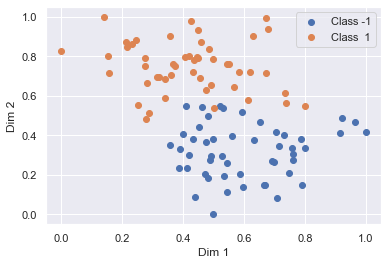

In [3]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0)
y[y == 0] = -1
X = MinMaxScaler().fit_transform(X)

data_class1 = X[y == 1]
data_class0 = X[y == -1]
plt.scatter(x=data_class1[:, 0], y=data_class1[:, 1], label="Class -1")
plt.scatter(x=data_class0[:, 0], y=data_class0[:, 1], label="Class  1")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.show()

We now train the perceptron on that data

In [4]:
learning_rate = 0.1
epochs = 300

perceptron = Perceptron(lr=learning_rate, epochs=epochs)
perceptron.fit(X, y)

We can plot the accuracy over training epochs and check if it 'learns something':

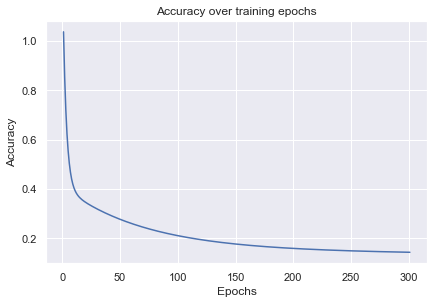

In [5]:
plt.plot(1 + np.arange(epochs + 1), perceptron.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.tight_layout(pad=.5)
plt.title("Accuracy over training epochs")
plt.show()

Let us now see how the decision boundary shifted over time

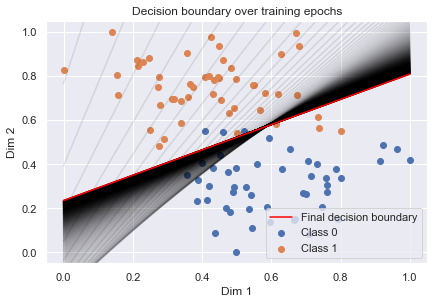

In [6]:
def plot_decision_boundary(X, weights, alpha=1.0, color="black", label: str = ""):
    sns.set()
    # The Line is y=mx+c
    # So, Equate mx+c = w0 * X0 + w1 * X1 + w2 * X2
    # Solving we find m and c
    x1 = np.sort(X[:, 0])
    slope = -weights[1] / weights[2]
    intercept = -weights[0] / weights[2]
    x2 = slope * x1 + intercept

    # Plotting
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.plot(x1, x2, color=color, alpha=alpha, label=label)

    yaxis_bounds = min(X[:, 1]) - 0.05, max(X[:, 1]) + 0.05
    xaxis_bounds = min(X[:, 0]) - 0.05, max(X[:, 0]) + 0.05
    plt.ylim(yaxis_bounds)
    plt.xlim(xaxis_bounds)


data_class1 = X[y == 1]
data_class0 = X[y == -1]
plt.scatter(x=data_class1[:, 0], y=data_class1[:, 1], label="Class 0")
plt.scatter(x=data_class0[:, 0], y=data_class0[:, 1], label="Class 1")

for weight_index, weights in enumerate(perceptron.weights_history):
    alpha = 0.3 * (0.3 + 0.7 * weight_index / len(perceptron.weights_history))
    plot_decision_boundary(X, weights, alpha=alpha, color="black")

plot_decision_boundary(X, perceptron.weights.flatten(), alpha=1, color="red", label="Final decision boundary")

plt.tight_layout(pad=.5)
plt.legend()
plt.title("Decision boundary over training epochs")
plt.show()